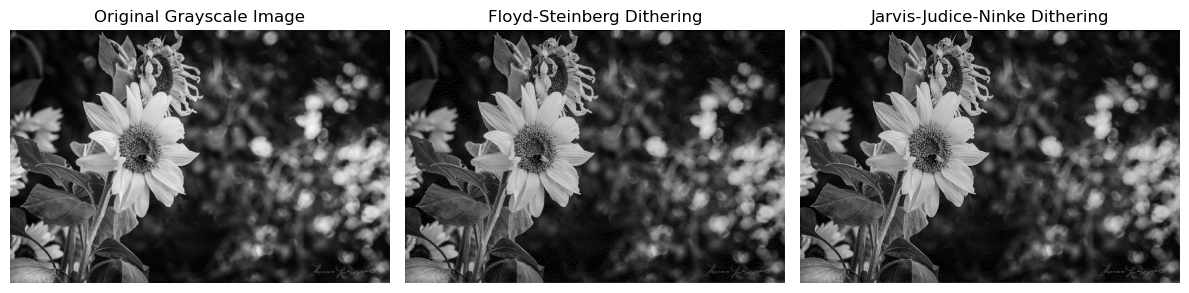

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert to grayscale
image_path = "C:\\Users\\ASUS\\Downloads\\img1.jpeg"
img = Image.open(image_path).convert('L')
img_np = np.array(img)

# Floyd-Steinberg Dithering Algorithm
def floyd_steinberg_dither(image):
    dithered_img = image.copy().astype(float)
    for y in range(image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            old_pixel = dithered_img[y, x]
            new_pixel = 255 * (old_pixel > 187)
            dithered_img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            dithered_img[y, x + 1] += quant_error * 7 / 16
            dithered_img[y + 1, x - 1] += quant_error * 3 / 16
            dithered_img[y + 1, x] += quant_error * 5 / 16
            dithered_img[y + 1, x + 1] += quant_error * 1 / 16

    return np.clip(dithered_img, 0, 255).astype(np.uint8)

# Jarvis-Judice-Ninke Dithering Algorithm
def jarvis_judice_ninke_dither(image):
    dithered_img = image.copy().astype(float)
    for y in range(image.shape[0] - 2):
        for x in range(2, image.shape[1] - 2):
            old_pixel = dithered_img[y, x]
            new_pixel = 255 * (old_pixel > 120)
            dithered_img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            dithered_img[y, x + 1] += quant_error * 7 / 48
            dithered_img[y, x + 2] += quant_error * 5 / 48
            dithered_img[y + 1, x - 2] += quant_error * 3 / 48
            dithered_img[y + 1, x - 1] += quant_error * 5 / 48
            dithered_img[y + 1, x] += quant_error * 7 / 48
            dithered_img[y + 1, x + 1] += quant_error * 5 / 48
            dithered_img[y + 1, x + 2] += quant_error * 3 / 48
            dithered_img[y + 2, x - 2] += quant_error * 1 / 48
            dithered_img[y + 2, x - 1] += quant_error * 3 / 48
            dithered_img[y + 2, x] += quant_error * 5 / 48
            dithered_img[y + 2, x + 1] += quant_error * 3 / 48
            dithered_img[y + 2, x + 2] += quant_error * 1 / 48

    return np.clip(dithered_img, 0, 255).astype(np.uint8)

# Apply both dithering algorithms
floyd_steinberg_result = floyd_steinberg_dither(img_np)
jarvis_judice_ninke_result = jarvis_judice_ninke_dither(img_np)

# Plot and compare the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Floyd-Steinberg Dithering')
plt.imshow(floyd_steinberg_result, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Jarvis-Judice-Ninke Dithering')
plt.imshow(jarvis_judice_ninke_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()